## Importing Libraries: 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

## Loading the Dataset: 

In [86]:
df = pd.read_csv('Grades.csv')

df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [88]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


## Data Pre-Processing:

In [89]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [90]:
# Mapping dictionary for grades
grade_mapping = {
    'A+': 4.3, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0.0,
    'WU': np.nan,
    'I': np.nan,
    'W': np.nan
}

# Replace letter grades with numerical values
df.replace(grade_mapping, inplace=True)

# Confirm all columns are numeric
print(df.dtypes)

Seat No.      object
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object


In [91]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [92]:
df.fillna(df.mean(), inplace=True)

df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

## EDA:

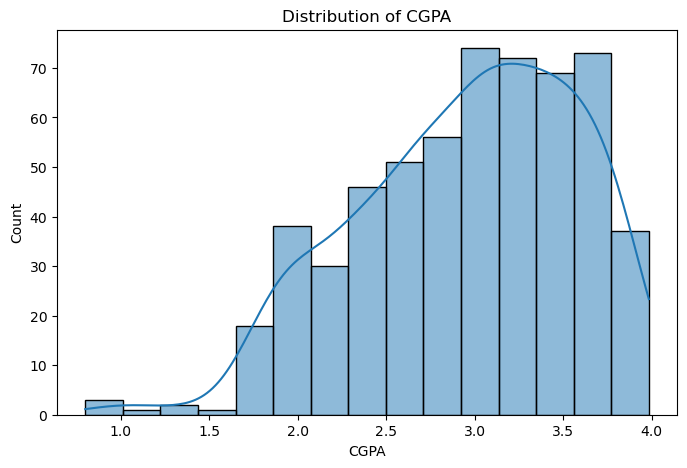

In [93]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.show()

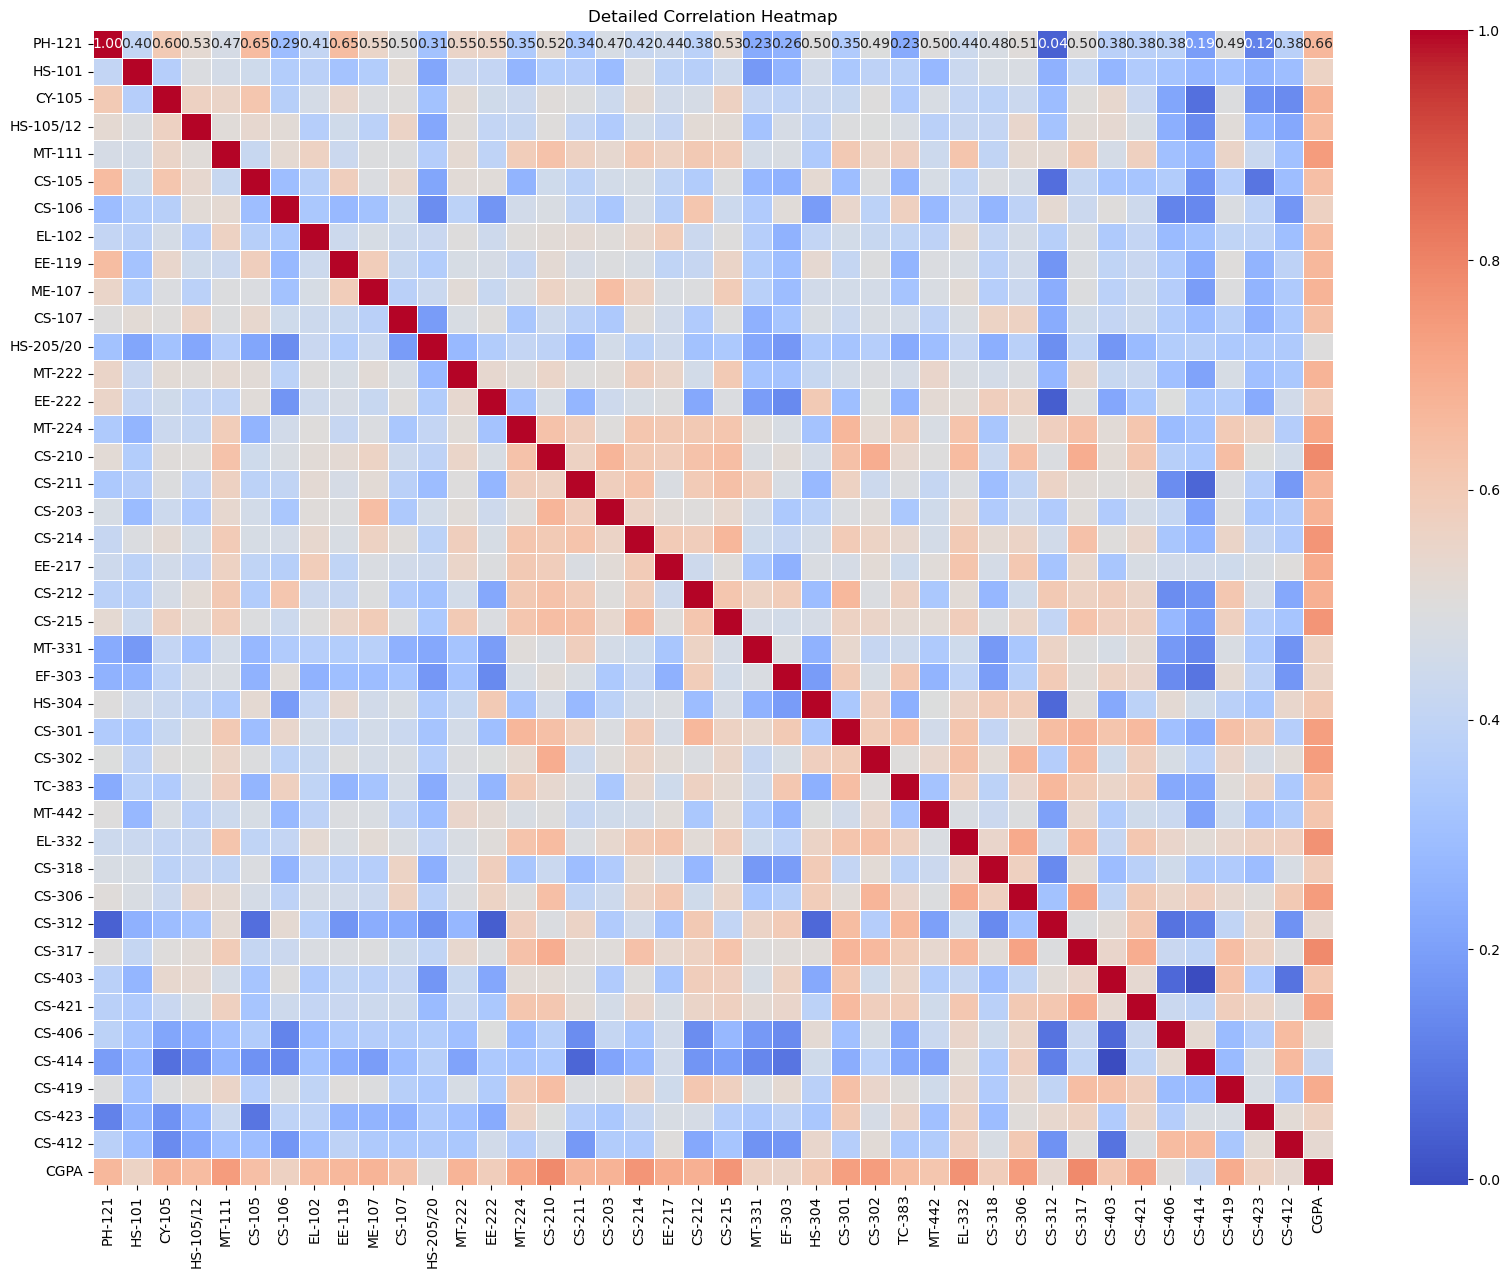

In [94]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation heatmap with detailed options
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Detailed Correlation Heatmap')
plt.show()

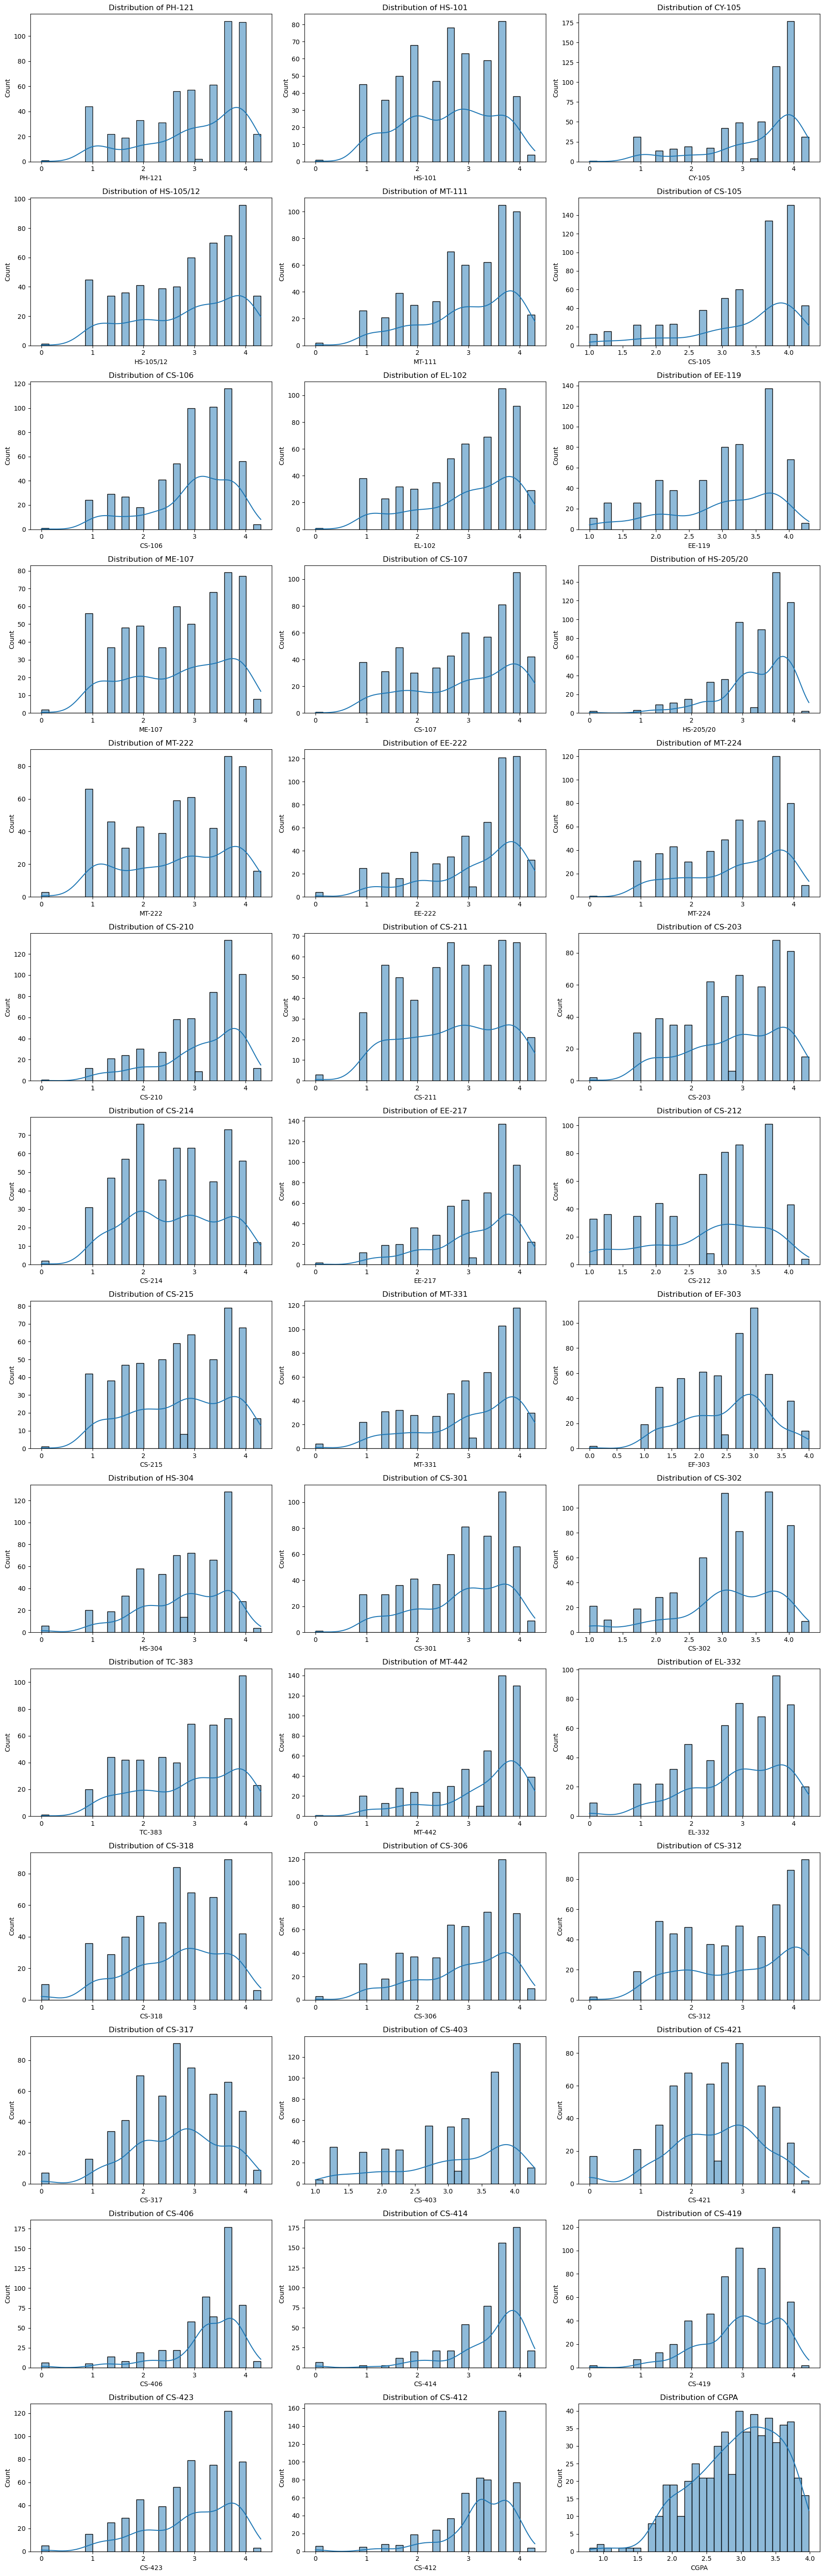

In [95]:
# Filter columns for visualization (excluding non-numeric ones like 'Seat No')
grade_columns = [col for col in df.columns if col != 'Seat No' and df[col].dtype != 'object']

# Determine the grid size for subplots
num_cols = 3  # Number of columns per row
num_features = len(grade_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Set up the figure size
plt.figure(figsize=(num_cols * 6, num_rows * 4))

# Create subplots for each feature
for i, col in enumerate(grade_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()

# Display the plot
plt.show()

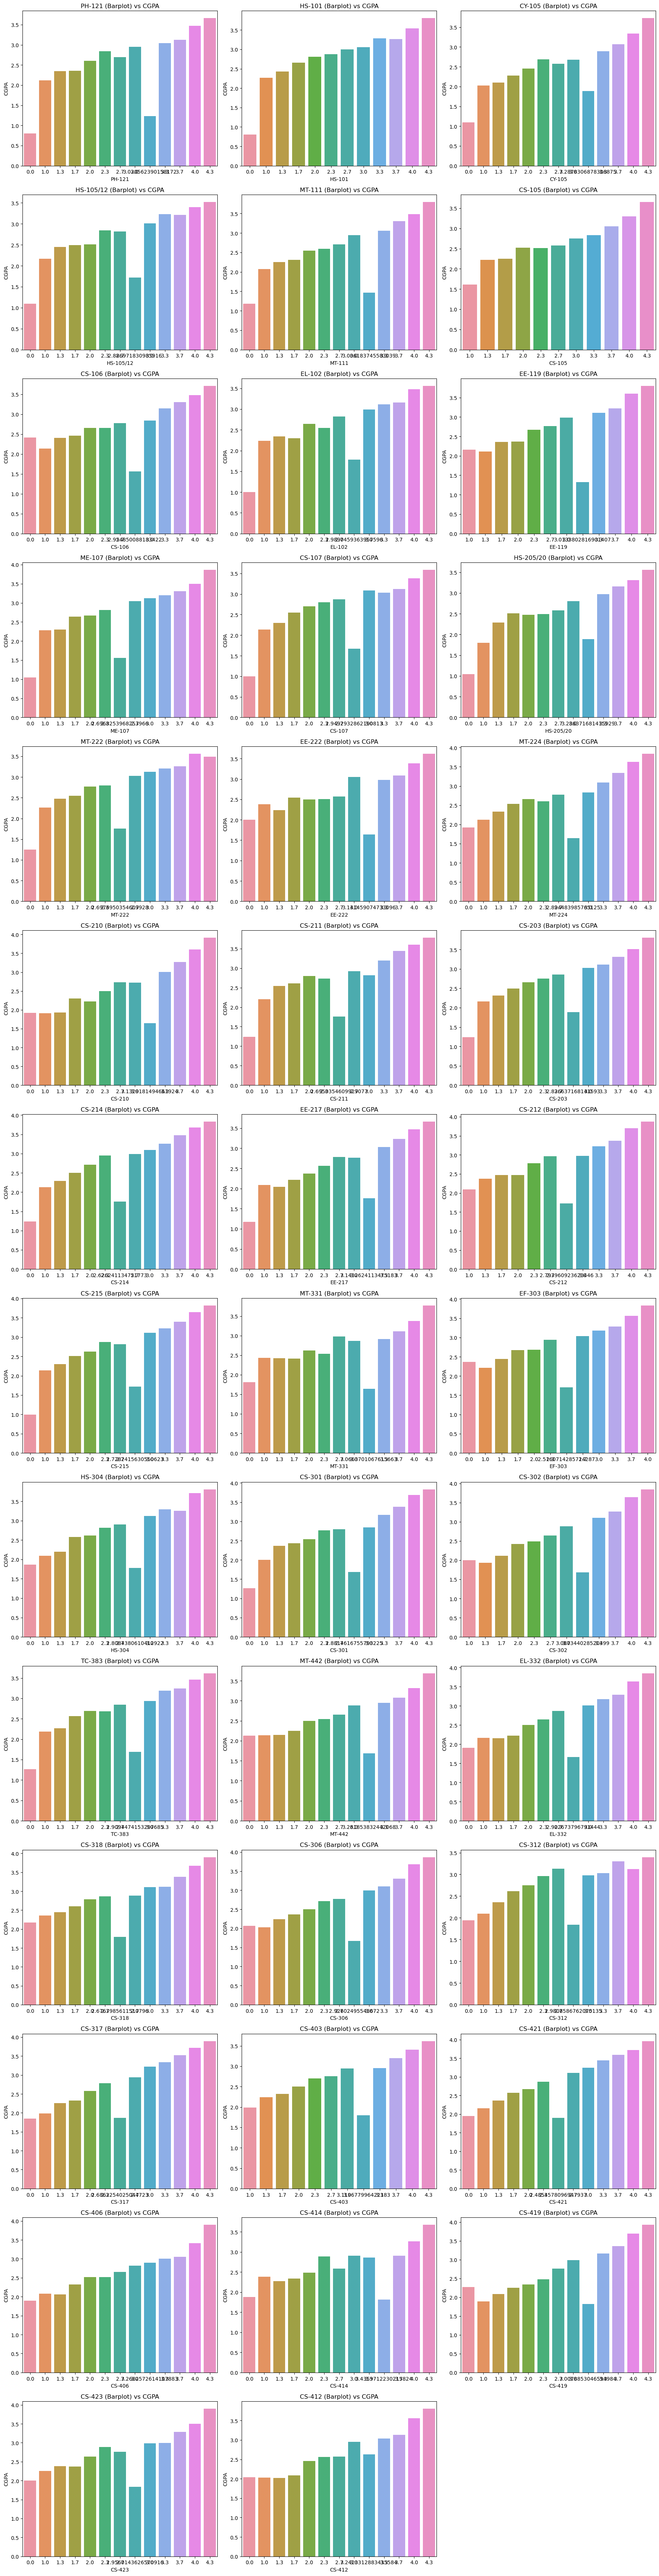

In [96]:
# Set up the grid size for subplots
num_cols = 3  # Number of columns per row
num_features = len(grade_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Set up the figure size
plt.figure(figsize=(num_cols * 6, num_rows * 5))

# Create bar or box plots for each feature
for i, col in enumerate(grade_columns):
    if col != 'CGPA':  # Ensure CGPA isn't plotted against itself
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Use boxplot for categorical or barplot for continuous
        if len(df[col].unique()) <= 10:  # Treat as categorical if few unique values
            sns.boxplot(data=df, x=col, y='CGPA')
            plt.title(f'{col} (Boxplot) vs CGPA')
        else:
            sns.barplot(x=col, y='CGPA', data=df, ci=None, estimator=np.mean)
            plt.title(f'{col} (Barplot) vs CGPA')
        
        plt.xlabel(col)
        plt.ylabel('CGPA')
        plt.tight_layout()

# Display the plots
plt.show()

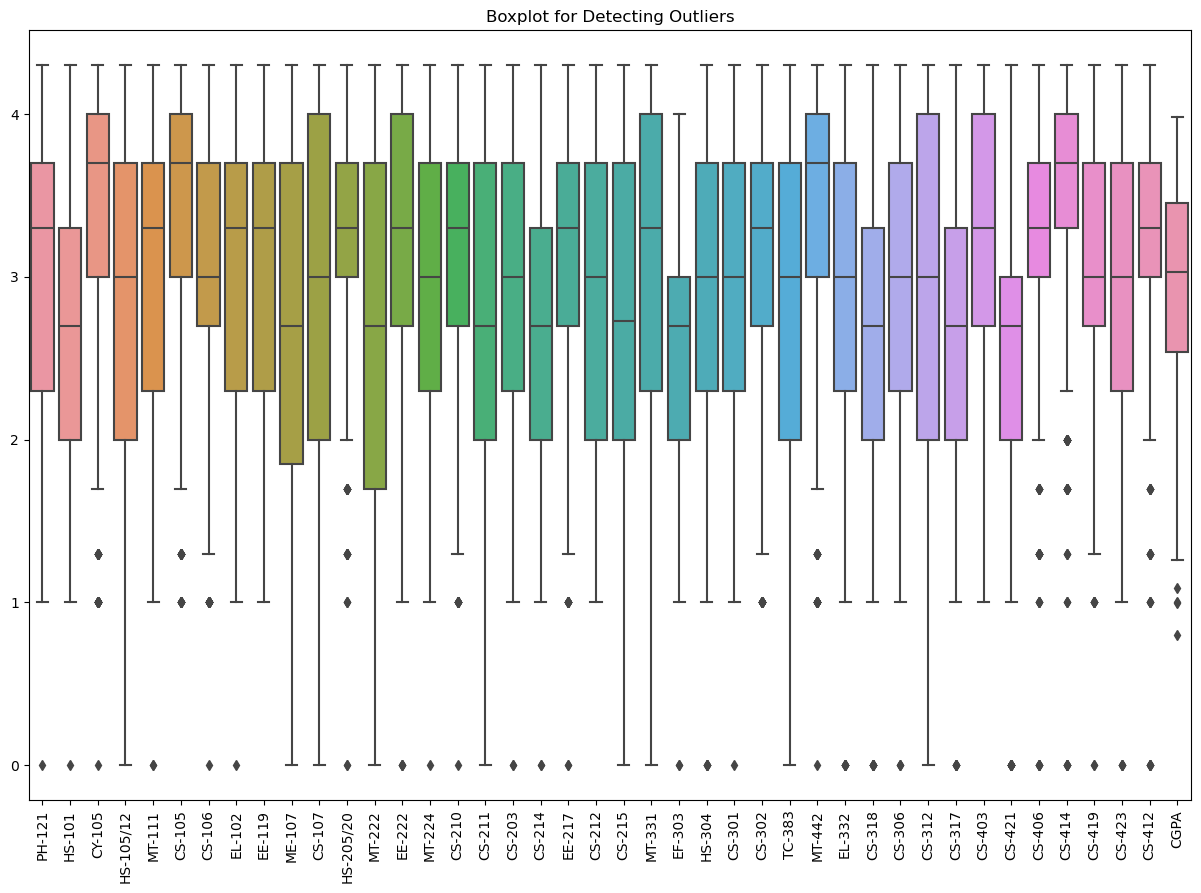

In [97]:
# Plot boxplots for all features to detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)  # Replace df with the actual DataFrame
plt.xticks(rotation=90)
plt.title("Boxplot for Detecting Outliers")
plt.show()

## Additional Processing:

In [98]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Check the shape before and after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Original data shape: (571, 43)
Data shape after removing outliers: (412, 43)


In [99]:
# Separate features and target variable
X = df.drop(['Seat No.', 'CGPA'], axis=1)
y = df['CGPA']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelling: 

### Linear Regressor:

In [101]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print('Linear Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 0.05636543440771648
RMSE: 0.07954552112901514
R2 Score: 0.9809863980476411


### Random Forest Regressor: 

In [102]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print('Random Forest Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest Metrics:
MAE: 0.0825645217391304
RMSE: 0.11276055980242604
R2 Score: 0.9617926091131391


## Hyper-Parameter Tuning: 

In [103]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)

# Predict using the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print('Best RF Model Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_best_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print('R2 Score:', r2_score(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Model Metrics:
MAE: 0.08406138133589526
RMSE: 0.11591766892320217
R2 Score: 0.9596231705911336


## Cross-Validation: 

In [104]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross-Validation RMSE:', np.sqrt(-cv_scores))
print('Mean CV RMSE:', np.mean(np.sqrt(-cv_scores)))

Cross-Validation RMSE: [0.1459371  0.12347937 0.15608487 0.15016636 0.15693608]
Mean CV RMSE: 0.14652075935523884


#### Linear Regressor Model gives 98% accuracy so we choose it as the final model. 

In [105]:
import pickle

with open('grades_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Model saved as 'grades_model.pkl")

Model saved as 'grades_model.pkl
